### Employee Exist Surveys Analysis  - Dataquest Practice Project

In this guided project I clean and analyse exit survey data from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The orginal TAFE exit survey data can be found [here](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and DETE exit survey data [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

In the project I aim to answer the following questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

**First I import the libraries required in the analysis and read in the data sets**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated") # "Not Stated" used for nan values in original dataset 
tafe_survey = pd.read_csv("tafe_survey.csv")

Next I have a quick overview of the data sets.

**The DETE survey data has:**
- 822 data entries
- complete data for SeparationType, Cease Date and DETE Start Date
- 11 missing values in Age data
- lots of additional data explaining reasons for ceasing employment with only a few missing values

**The TAFE survey data has:**
- 702 data entries
- 1 missing value for Reason for ceasing employment data
- 7 missing values for CESSATION YEAR data
- 106 missing values for LengthofServiceOverall (Overall Length of Service at Institute in years)
- 106 missing values for CurrentAge data
- lots of additional data explaining reasons for ceasing employmen most missing atleast around 100 values



In [2]:
print("DETE Survey data")
print("\n")
dete_survey.info()

print("\n")
print("Sum of null values")
print("\n")
print(dete_survey.isnull().sum())

dete_survey.head()

DETE Survey data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool


,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [3]:
print("TAFE Survey data")
print("\n")
tafe_survey.info()

print("\n")
print("Sum of null values")
print("\n")
print(tafe_survey.isnull().sum())

tafe_survey.head()

TAFE Survey data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                         

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


**Further analysis with value counts method reveals, that:**

**At DETE:**
- retirement due to age is common reason for ceasing employment
- additional information in boolean and in some categorized form can be used to reveal information about potential dissatisfaction. Further information needed about the categorized answers.

**At TAFE:**
- age retirement is less common than at DETE
- contributin factors for ceasing employment can be used to reveal additional information about the reasons for quiting, but data not available for every employee.
- main factor for leaving available for less than 20% of the employees, coverage too low?
- institute views (interview questions) data has good coverage and can be used for further analysis of the reasons for ceasing employment



In [4]:
print("DETE survey - SeparationType value counts")
print(dete_survey["SeparationType"].value_counts(dropna = False))

print("\n")
print("DETE survey - Age value counts")
print(dete_survey["Age"].value_counts(dropna = False))

print("\n")
print("DETE survey - DETE Start Date value counts")
print(dete_survey["DETE Start Date"].value_counts(dropna = False))

print("\n")
print("DETE survey - Job dissatisfaction")
print(dete_survey["Job dissatisfaction"].value_counts(dropna = False))

print("\n")
print("DETE survey - Workplace issue")
print(dete_survey["Workplace issue"].value_counts(dropna = False))

print("\n")
print("DETE survey - Career Aspirations")
print(dete_survey["Career Aspirations"].value_counts(dropna = False))




DETE survey - SeparationType value counts
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: SeparationType, dtype: int64


DETE survey - Age value counts
61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64


DETE survey - DETE Start Date value counts
NaN       73
2011.0    40
2007.0    34
2008.0    31
2010.0    27
2012.0    27
2009.0    24
2006.0    23
1970.0    21
1975.0    21
2013.0    21
2005.0    20
1990.0    20
1999.0    19
1996.0    19

In [5]:
print("TAFE survey - Reason for ceasing employment value counts")
print(tafe_survey["Reason for ceasing employment"].value_counts(dropna = False))

print("\n")
print("TAFE survey - Current Age value counts")
print(tafe_survey["CurrentAge. Current Age"].value_counts(dropna = False))

print("\n")
print("TAFE survey - Contributing Factors. Job Dissatisfaction value counts")
print(tafe_survey["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False))

print("\n")
print("TAFE survey - Main Factor. Which of these was the main factor for leaving? value counts")
print(tafe_survey["Main Factor. Which of these was the main factor for leaving?"].value_counts(dropna = False))
 
print("\n")
print("TAFE survey - InstituteViews. Topic:4. I was given adequate opportunities for promotion within Institute value counts")
print(tafe_survey["InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%"].value_counts(dropna = False))


TAFE survey - Reason for ceasing employment value counts
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64


TAFE survey - Current Age value counts
56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64


TAFE survey - Contributing Factors. Job Dissatisfaction value counts
-                      360
NaN                    265
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


TAFE survey - Main Factor. Which of these was the main factor for leaving? value counts
NaN                                         589
Dissatisfaction with %

**Next I drop unnecessary data (columns) not used in this analysis:**



In [6]:
print(dete_survey.columns[28:49])

print(tafe_survey.columns[17:66])


Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')
Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the j

In [7]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)
print(dete_survey_updated.info())

tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)
print(tafe_survey_updated.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

**Next I clean and harmonize the column names of the two data sets.**

**DETE survey column names are updated as follows:**
- capitalization lowercase
- trailing whitespace removed from the end of the strings
- spaces replaced with underscores ('_')

**TAFE survey column names are updated as follows:**
- columns with similar data to DETE survey data set updated with DETE survey column names (detailed listing below under "updated_names" variable)


In [8]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(" ", "_")

print("DETE column names")
print("\n")
print(dete_survey_updated.columns)

updated_names = {
'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=updated_names)

print("\n")
print("TAFE column names")
print("\n")
print(tafe_survey_updated.columns)

print("\n")
print("DETE head")
print("\n")
print(dete_survey_updated.head())

print("\n")
print("TAFE head")
print("\n")
print(tafe_survey_updated.head())

DETE column names


Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


TAFE column names


Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contribu

**Next I identify and filter the data points (rows) relevent for the analysis (employees, who resigned).**

In [9]:
print("DETE separation types value counts")
print(dete_survey_updated["separationtype"].value_counts())
print("\n")
print("TAFE separation type value counts")
print(tafe_survey_updated["separationtype"].value_counts())

DETE separation types value counts
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


TAFE separation type value counts
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


Only those separation types that are due to resignation (voluntary termination of employment) are relevant for the analysis and selected for further analysis.

In [10]:
dete_resignations = dete_survey_updated.loc[(dete_survey_updated["separationtype"] == "Resignation-Other reasons") | (dete_survey_updated["separationtype"] == "Resignation-Other employer") | (dete_survey_updated["separationtype"] == "Resignation-Move overseas/interstate")].copy()
print(dete_resignations["separationtype"].value_counts())
print("\n")

tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated["separationtype"] == "Resignation"].copy()
print(tafe_resignations["separationtype"].value_counts())

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64


Resignation    340
Name: separationtype, dtype: int64


**Next I spend some time verifying the data filtered for further analysis focusing on date data.**

First the cease date in DETE data has to be cleaned into year form.

In [11]:
print(dete_resignations["cease_date"].value_counts(dropna = False))

cease_years = dete_resignations["cease_date"].str[-4:].astype(dtype = "float")
print(cease_years)
dete_resignations["cease_date"] = cease_years


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
09/2010      1
07/2012      1
2010         1
07/2006      1
Name: cease_date, dtype: int64
3      2012.0
5      2012.0
8      2012.0
9      2012.0
11     2012.0
        ...  
808    2013.0
815    2014.0
816    2014.0
819    2014.0
821    2013.0
Name: cease_date, Length: 311, dtype: float64


The date data is printed in sorted form to identify any dubious years. All the years seem to be realistic.

In [12]:
print(dete_resignations["cease_date"].value_counts(dropna = False).sort_index(ascending = True))
print(dete_resignations["dete_start_date"].value_counts(dropna = False).sort_index(ascending = True))
print(tafe_resignations["cease_date"].value_counts(dropna = False).sort_index(ascending = True))

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: cease_date, dtype: int64
1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64
2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64


**Next a new column is created to the DETE data set to represent the length of service of each employee. The TAFE data set already includes similar column.**

In [13]:
dete_resignations["institute_service"] = dete_resignations["cease_date"] - dete_resignations["dete_start_date"]
print(dete_resignations["institute_service"].value_counts().sort_index())

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64


In [14]:
print(tafe_resignations["institute_service"].value_counts().sort_index())

1-2                   64
11-20                 26
3-4                   63
5-6                   33
7-10                  21
Less than 1 year      73
More than 20 years    10
Name: institute_service, dtype: int64


**Next I create a new column "dissatisfied" for both data sets, which will indicate, whether a person resigned due to dissatisfaction.**

In [15]:
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna = False))
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


The values in the TAFE survey indicating job dissatisfaction have to be first updated into boolean values:

In [16]:
def update_vals(element):
    if element == "-":
        return False
    if pd.isnull(element):
        return np.nan
    else:
        return True

tafe_resignations.loc[:, ("Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction")] = tafe_resignations.loc[: ,("Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction")].applymap(update_vals)

In [17]:
print(tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].info())
print(tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna = False))
print(tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna = False))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 2 columns):
Contributing Factors. Dissatisfaction        332 non-null object
Contributing Factors. Job Dissatisfaction    332 non-null object
dtypes: object(2)
memory usage: 8.0+ KB
None
False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [18]:
print(dete_resignations[["job_dissatisfaction",
"dissatisfaction_with_the_department",
"physical_work_environment",
"lack_of_recognition",
"lack_of_job_security",
"work_location",
"employment_conditions",
"work_life_balance",
"workload"]].info())
print(dete_resignations["job_dissatisfaction"].value_counts(dropna = False))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 9 columns):
job_dissatisfaction                    311 non-null bool
dissatisfaction_with_the_department    311 non-null bool
physical_work_environment              311 non-null bool
lack_of_recognition                    311 non-null bool
lack_of_job_security                   311 non-null bool
work_location                          311 non-null bool
employment_conditions                  311 non-null bool
work_life_balance                      311 non-null bool
workload                               311 non-null bool
dtypes: bool(9)
memory usage: 5.2 KB
None
False    270
True      41
Name: job_dissatisfaction, dtype: int64


New boolean column "dissatisfied" indicating any job dissatisfaction is created for both dataframes:

In [19]:
tafe_resignations["dissatisfied"] = tafe_resignations[["Contributing Factors. Dissatisfaction", "Contributing Factors. Job Dissatisfaction"]].any(axis=1, skipna = False)
dete_resignations["dissatisfied"] = dete_resignations[["job_dissatisfaction",
"dissatisfaction_with_the_department",
"physical_work_environment",
"lack_of_recognition",
"lack_of_job_security",
"work_location",
"employment_conditions",
"work_life_balance",
"workload"]].any(axis=1, skipna = False)

In [20]:
print(tafe_resignations["dissatisfied"].value_counts(dropna=False))
print(dete_resignations["dissatisfied"].value_counts(dropna=False))

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64
False    162
True     149
Name: dissatisfied, dtype: int64


The results are saved to two new dataframes:

In [21]:
tafe_resignations_up = tafe_resignations.copy()
dete_resignations_up = dete_resignations.copy()

**Next the two dataframes are combined. First a column with the original dataframe name is added to both dataframes:**

In [22]:
tafe_resignations_up["institute"] = "TAFE"
dete_resignations_up["institute"] = "DETE"

print(tafe_resignations_up.head())
print(dete_resignations_up.head())

             id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                                                  -   
7                     

The dataframes are combined:

In [23]:
print(tafe_resignations_up.columns)
print(dete_resignations_up.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied', 'institute'],
      dtype='object')
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',


In [24]:
combined = pd.concat([tafe_resignations_up, dete_resignations_up], sort = False)
print(combined.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service', 'dissatisfied', 'institute', 'dete_start_date',
       'role_start_date', 'classification', 'region', 'business_unit',
       'career_move_to_public_sector', 'career_move_to_private_sector',
       'interpersonal_conflicts', 'job_dissatisfaction',
       'dis

Columns with less than 500 non-null values are dropped from the combined dataframe:

In [25]:
print(combined.isnull().sum())

id                                                       0
Institute                                              311
WorkArea                                               311
cease_date                                              16
separationtype                                           0
Contributing Factors. Career Move - Public Sector      319
Contributing Factors. Career Move - Private Sector     319
Contributing Factors. Career Move - Self-employment    319
Contributing Factors. Ill Health                       319
Contributing Factors. Maternity/Family                 319
Contributing Factors. Dissatisfaction                  319
Contributing Factors. Job Dissatisfaction              319
Contributing Factors. Interpersonal Conflict           319
Contributing Factors. Study                            319
Contributing Factors. Travel                           319
Contributing Factors. Other                            319
Contributing Factors. NONE                             3

In [26]:
combined_updated = combined.dropna(axis=1, thresh = 500).copy()
print(combined_updated.isnull().sum())
print(combined_updated.columns)
print(combined_updated.info())

id                    0
cease_date           16
separationtype        0
gender               59
age                  55
employment_status    54
position             53
institute_service    88
dissatisfied          8
institute             0
dtype: int64
Index(['id', 'cease_date', 'separationtype', 'gender', 'age',
       'employment_status', 'position', 'institute_service', 'dissatisfied',
       'institute'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 821
Data columns (total 10 columns):
id                   651 non-null float64
cease_date           635 non-null float64
separationtype       651 non-null object
gender               592 non-null object
age                  596 non-null object
employment_status    597 non-null object
position             598 non-null object
institute_service    563 non-null object
dissatisfied         643 non-null object
institute            651 non-null object
dtypes: float64(2), object(8)
memory usage: 55.9

**Before the actual analysis, institute_service column needs to be cleaned. Length of service will be categorized:**

In [27]:
print(combined_updated["institute_service"].unique())
print("\n")
print(combined_updated["institute_service"].value_counts(dropna=False))

[nan '3-4' '7-10' '1-2' 'Less than 1 year' '11-20' '5-6'
 'More than 20 years' 7.0 18.0 3.0 15.0 14.0 5.0 30.0 32.0 39.0 17.0 9.0
 6.0 1.0 35.0 38.0 36.0 19.0 4.0 26.0 10.0 8.0 2.0 0.0 23.0 13.0 16.0 12.0
 21.0 20.0 24.0 33.0 22.0 28.0 49.0 11.0 41.0 27.0 42.0 25.0 29.0 34.0
 31.0]


NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
23.0           

The values will be converted into the following categories:

    New: Less than 3 years at a company
    Experienced: 3-6 years at a company
    Established: 7-10 years at a company
    Veteran: 11 or more years at a company

The values that are not expressed in plain numeric format will be first converted to numeric format. For the range values the latter figure from the range will be selected as it will be sufficient information for the later categorization of the values. For 'More than 20 years' the value 20 will be assigned and ror 'Less than 1 year' the value 1 will be assigned.

In [28]:
combined_updated.loc[:, "institute_service"] = combined_updated.loc[:, "institute_service"].astype(str)
combined_updated.loc[:, "institute_service"] = combined_updated.loc[:, "institute_service"].str.replace("Less","").str.replace("More","").str.replace("than","").str.replace("year","").str.replace("s","")

combined_updated.loc[:, "institute_service"] =  combined_updated.loc[:, "institute_service"].str.split("-").str.get(-1)
combined_updated.loc[:, "institute_service"] =  combined_updated.loc[:, "institute_service"].astype(float)

print(combined_updated["institute_service"].unique())
print("\n")
print(combined_updated["institute_service"].value_counts(dropna=False))


[nan  4. 10.  2.  1. 20.  6.  7. 18.  3. 15. 14.  5. 30. 32. 39. 17.  9.
 35. 38. 36. 19. 26.  8.  0. 23. 13. 16. 12. 21. 24. 33. 22. 28. 49. 11.
 41. 27. 42. 25. 29. 34. 31.]


1.0     95
NaN     88
4.0     79
2.0     78
6.0     50
20.0    43
10.0    27
5.0     23
0.0     20
3.0     20
9.0     14
7.0     13
13.0     8
8.0      8
15.0     7
22.0     6
17.0     6
12.0     6
14.0     6
18.0     5
16.0     5
24.0     4
23.0     4
11.0     4
32.0     3
39.0     3
19.0     3
21.0     3
30.0     2
36.0     2
26.0     2
28.0     2
25.0     2
35.0     1
38.0     1
34.0     1
33.0     1
49.0     1
41.0     1
27.0     1
42.0     1
29.0     1
31.0     1
Name: institute_service, dtype: int64


Next the numeric values are mapped to categories and the information is saved to a new column called "service_cat":

In [29]:
def year_category(value):
    if pd.isnull(value):
        return np.nan
    if value < 3:
        return "New: Less than 3 years at a company"
    if 3 <= value < 7:
        return "Experienced: 3-6 years at a company"
    if 7 <= value < 11:
        return "Established: 7-10 years at a company"
    if 11 <= value:
        return "Veteran: 11 or more years at a company"

In [30]:
combined_updated.loc[:, "service_cat"] = combined_updated.loc[:, "institute_service"].apply(year_category)
print(combined_updated["service_cat"].value_counts(dropna=False))

New: Less than 3 years at a company       193
Experienced: 3-6 years at a company       172
Veteran: 11 or more years at a company    136
NaN                                        88
Established: 7-10 years at a company       62
Name: service_cat, dtype: int64


**Next I will analyse if the dissatisfaction among resigned employees differs for different lentghs of employment:**

In [31]:
print(combined_updated.columns)

Index(['id', 'cease_date', 'separationtype', 'gender', 'age',
       'employment_status', 'position', 'institute_service', 'dissatisfied',
       'institute', 'service_cat'],
      dtype='object')


In [32]:
print(combined_updated["dissatisfied"].value_counts(dropna=False))

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64


The missing values in the "dissatisfied" column will be filled in with the most common value of the column, which is "False":

In [33]:
combined_updated.loc[:, "dissatisfied"].fillna(False, inplace = True)
print(combined_updated["dissatisfied"].value_counts(dropna=False))

False    411
True     240
Name: dissatisfied, dtype: int64


To answer the first question I use pivot table to calculate the share of dissatisfied employees in each service category.

**Based on the bar chart below, of the employees who resigned, those who have worked more than 7 years at the organization seem to be more dissatisfied.**

In [34]:
dissatisfied_per_cat = combined_updated.pivot_table(values = "dissatisfied", index = "service_cat", aggfunc = np.mean, dropna=False).sort_values(by = "dissatisfied")
print(dissatisfied_per_cat)

                                        dissatisfied
service_cat                                         
New: Less than 3 years at a company         0.295337
Experienced: 3-6 years at a company         0.343023
Veteran: 11 or more years at a company      0.485294
Established: 7-10 years at a company        0.516129


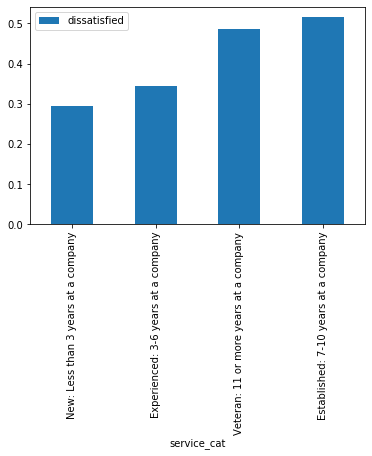

In [35]:
dissatisfied_per_cat.plot(kind="bar")

**Next I will analyse if the dissatisfaction among resigned employees differs for younger and older employees.**

I will first clean the age data:

In [36]:
print(combined_updated["age"].value_counts(dropna=False))

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
31  35           32
36  40           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64


Employee ages will be categorized into following categories:
- Youngsters: 25 years or less
- Young adults: more than 25 and 35 years or less
- Early middle-age: more than 35 and 45 years or less
- Late middle-age: more than 45 and 55 years or less
- Seniors: more than 55

The age data is represented in ranges. In the data cleaning process, the first number of the range will be picked up (or the only number) and the ages will be categorized according to that number.

In [37]:
combined_updated.loc[:, "age"] = combined_updated.loc[:, "age"].astype(str) # age data is first saved into string format

combined_updated.loc[:, "age"] = combined_updated.loc[:, "age"].str.replace("or", "").str.replace("older", "").str.replace("younger", "")
# words removed

print(combined_updated["age"].value_counts(dropna=False))

51-55     71
nan       55
41-45     48
41  45    45
46-50     42
36-40     41
46  50    39
26-30     35
21  25    33
26  30    32
31  35    32
36  40    32
21-25     29
31-35     29
56        29
56-60     26
61        23
20        10
Name: age, dtype: int64


In [38]:
combined_updated.loc[:, "age"] = combined_updated.loc[:, "age"].str.split("-").str.get(0).str.split(" ").str.get(0).str.strip()

combined_updated.loc[:, "age"] = combined_updated.loc[:, "age"].astype(float) # age data saved back to numeric format
print(combined_updated["age"].value_counts(dropna=False))

41.0    93
46.0    81
36.0    73
51.0    71
26.0    67
21.0    62
31.0    61
56.0    55
NaN     55
61.0    23
20.0    10
Name: age, dtype: int64


Next I define a function and use it to categorize the age data:

In [39]:
def age_category(value):
    if pd.isnull(value):
        return np.nan
    if value <= 25:
        return "Youngsters: 25 years or less"
    if 25 < value <= 35:
        return "Young adults: more than 25 and 35 years or less"
    if 35 < value <= 45:
        return "Early middle-age: more than 35 and 45 years or less"
    if 45 < value <= 55:
        return "Late middle-age: more than 45 and 55 years or less"
    if 55 < value:
        return "Seniors: more than 55"

In [40]:
combined_updated.loc[:, "age_cat"] = combined_updated.loc[:, "age"].apply(age_category)
print(combined_updated["age_cat"].value_counts(dropna=False))

Early middle-age: more than 35 and 45 years or less    166
Late middle-age: more than 45 and 55 years or less     152
Young adults: more than 25 and 35 years or less        128
Seniors: more than 55                                   78
Youngsters: 25 years or less                            72
NaN                                                     55
Name: age_cat, dtype: int64


Next I use pivot table to calcualte average level of dissatisfaction in each age category and use bar plot to visualize the results:

**Based on the bar chart below, of the employees who resigned, older employees seem to be more dissatisfied. Interestingly though, early middle age employees were less dissatisfied than young adults.**

In [41]:
dissatisfied_per_age = combined_updated.pivot_table(values = "dissatisfied", index = "age_cat", aggfunc = np.mean, dropna=False).sort_values(by = "dissatisfied")
print(dissatisfied_per_age)

                                                    dissatisfied
age_cat                                                         
Youngsters: 25 years or less                            0.291667
Early middle-age: more than 35 and 45 years or ...      0.361446
Young adults: more than 25 and 35 years or less         0.398438
Late middle-age: more than 45 and 55 years or less      0.401316
Seniors: more than 55                                   0.423077


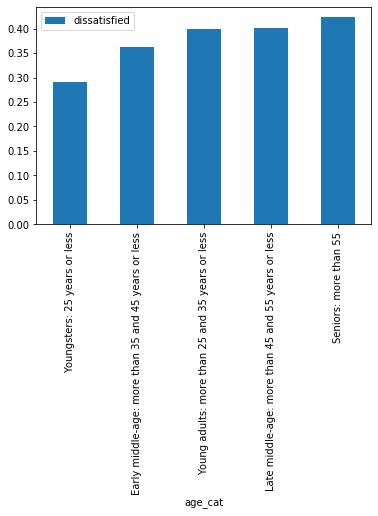

In [42]:
dissatisfied_per_age.plot(kind="bar")